In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Seeding so that we get consistent results
np.random.seed(42)
sns.set()

In [3]:
df = pd.read_csv( "Data.csv" )
df.shape

(55071, 15)

In [4]:
df.head()

,Unnamed: 0,activity,borrower_genders,country,country_code,currency_policy,distribution_model,lender_count,loan_amount,original_language,repayment_interval,sector,status,term_in_months,rMPI
0,1,Fruits & Vegetables,female,Nicaragua,NI,shared,field_partner,12,525,Spanish,irregular,Food,funded,1 Year,0.161
1,2,Retail,female,Kenya,KE,shared,field_partner,20,600,English,monthly,Retail,funded,14,0.223
2,3,Food Production/Sales,female,Nigeria,NG,not shared,field_partner,33,1200,English,monthly,Food,funded,10,0.107
3,4,Consumer Goods,female,Philippines,PH,shared,field_partner,7,175,English,irregular,Personal Use,funded,8,0.039
4,5,Grocery Store,female,Mongolia,MN,shared,field_partner,46,1225,English,monthly,Food,funded,20,0.006


In [5]:
#Dropping the Unnamed Column

df.drop( df.columns[[0]], axis=1, inplace=True )

In [6]:
df.info()

#We can see that the column borrower_genders consists 9 null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55071 entries, 0 to 55070
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activity            55071 non-null  object 
 1   borrower_genders    55062 non-null  object 
 2   country             55071 non-null  object 
 3   country_code        55071 non-null  object 
 4   currency_policy     55071 non-null  object 
 5   distribution_model  55071 non-null  object 
 6   lender_count        55071 non-null  int64  
 7   loan_amount         55071 non-null  int64  
 8   original_language   55071 non-null  object 
 9   repayment_interval  55071 non-null  object 
 10  sector              55071 non-null  object 
 11  status              55071 non-null  object 
 12  term_in_months      55071 non-null  object 
 13  rMPI                55071 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 5.9+ MB


In [7]:
#Droppping null values as they are negligible.

df.dropna( inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55062 entries, 0 to 55070
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activity            55062 non-null  object 
 1   borrower_genders    55062 non-null  object 
 2   country             55062 non-null  object 
 3   country_code        55062 non-null  object 
 4   currency_policy     55062 non-null  object 
 5   distribution_model  55062 non-null  object 
 6   lender_count        55062 non-null  int64  
 7   loan_amount         55062 non-null  int64  
 8   original_language   55062 non-null  object 
 9   repayment_interval  55062 non-null  object 
 10  sector              55062 non-null  object 
 11  status              55062 non-null  object 
 12  term_in_months      55062 non-null  object 
 13  rMPI                55062 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 6.3+ MB


# __1)__ Top 10 types of activities for which loan was requested. 

In [8]:
df.activity.value_counts()[:10]

General Store                4771
Farming                      4655
Retail                       3009
Clothing Sales               2559
Personal Housing Expenses    2550
Food Production/Sales        2247
Agriculture                  1831
Grocery Store                1714
Home Appliances              1582
Pigs                         1449
Name: activity, dtype: int64

# __2)__ Distribution of Loan by Gender or Group 

In [9]:
df.borrower_genders.value_counts()

female    33698
male      13178
group      8186
Name: borrower_genders, dtype: int64

# __3)__ Top 10 Countries in Which Loan was Disbursed 

In [10]:
df.country.value_counts()[:10]

Philippines    9654
Cambodia       5166
Kenya          5130
Nicaragua      3755
Peru           3655
El Salvador    3321
Tajikistan     2159
Colombia       1941
Uganda         1837
Nigeria        1814
Name: country, dtype: int64

# __4)__ Distribution of Loan by Currency Policy

In [11]:
df.currency_policy.value_counts()

shared        42908
not shared    12154
Name: currency_policy, dtype: int64

# __5)__ Loan Distribution Models 

In [12]:
df.distribution_model.value_counts()

field_partner    55062
Name: distribution_model, dtype: int64

# __6)__ Ten most Popular Lender Counts for the Loans Distributed

In [13]:
df.lender_count.value_counts()[:10]

8     2525
7     2437
10    2389
9     2385
5     2365
6     2278
11    1972
12    1948
4     1928
13    1813
Name: lender_count, dtype: int64

# __7)__ Ten most Popular Loan Amounts for the Loans Distributed

In [14]:
df.loan_amount.value_counts()[:10]

1000    2555
500     2457
250     2124
300     2122
200     2017
400     1681
600     1677
225     1660
125     1640
350     1564
Name: loan_amount, dtype: int64

# __8)__ Distribution of Languages in which Loan Form was Filled

In [15]:
df.original_language.value_counts()

English       34525
Spanish       15911
French         3046
Russian        1280
Portuguese      118
Vietnamese       99
Indonesian       59
Arabic           24
Name: original_language, dtype: int64

# __9)__ Distribution of Repayment Intervals for Loans Disbursed

In [16]:
df.repayment_interval.value_counts()

monthly      31723
irregular    18538
bullet        4801
Name: repayment_interval, dtype: int64

# __10)__ Distribution of Loans Disbursed Sectors

In [17]:
df.sector.value_counts()

Food              12161
Retail            11944
Agriculture       11439
Services           3821
Clothing           3443
Personal Use       2941
Housing            2691
Education          1883
Transportation     1555
Arts               1038
Construction        806
Health              618
Manufacturing       566
Wholesale            78
Entertainment        78
Name: sector, dtype: int64

# __11)__ Distribution of the Funding Status of the Loan

In [18]:
x = df.status.value_counts()[1]
y = df.status.value_counts()[0]

print( x/y )

0.13990559788009274


# __12)__ Top 10 Duration in Months for Which the Loan was Disbursed

In [19]:
df.term_in_months.value_counts()[:10]

14        13629
8         10179
7          3310
6          3040
15         2896
20         2827
11         2610
1 Year     2558
10         2515
13         2177
Name: term_in_months, dtype: int64

# We can see that the Loan Amount and the Number of Lenders are Correlated 

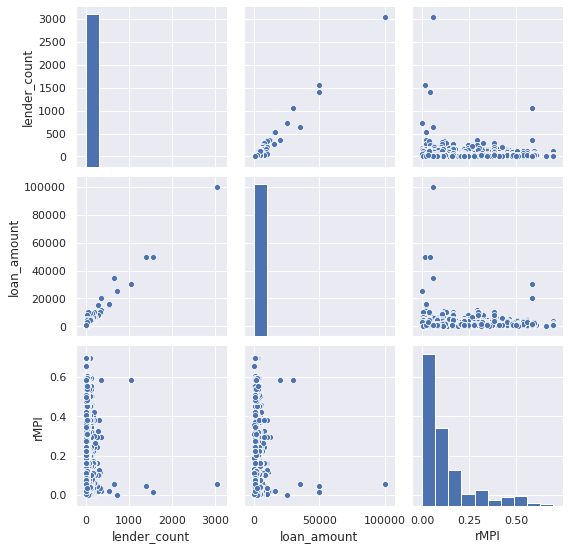

In [20]:
_ = sns.pairplot(df)

[[1.         0.86796947]
 [0.86796947 1.        ]]


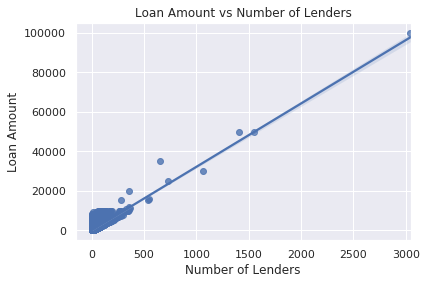

In [21]:
_ = sns.regplot( df.lender_count, df.loan_amount )
_ = plt.xlabel( "Number of Lenders" )
_ = plt.ylabel( "Loan Amount" )
_ = plt.title( "Loan Amount vs Number of Lenders" )

print( np.corrcoef( df.lender_count, df.loan_amount ) )

### In the above Pairplot we can see that the loan amount and lender count are positively correlated

In [22]:
#Trying to find the percentage of loans funded on an average

funded = df.status.value_counts().values[0]
not_funded = df.status.value_counts().values[1]
total = funded + not_funded
funding_percentage = funded / total * 100

print( f"The average funding percentage is: {round(funding_percentage, 2)}%" )

The average funding percentage is: 87.73%


In [23]:
#A function that calculates the funding percentage for a given dataset

def funding_percentage( data ):
    funded = data.status.value_counts().values[0]
    try:
        not_funded = data.status.value_counts().values[1]
    except:
        not_funded = 0
    total = funded + not_funded
    funding_percentage = funded / total * 100
    
    return round(funding_percentage, 1)

# Finding the funding percentage for various Languages

In [24]:
for language in df["original_language"].unique():
    lang_df = df[ df["original_language"] == language ]
    
    if len(lang_df) >= 1000:
        print( f"The funding percentage for {language} language is: {funding_percentage( lang_df )}%" )

The funding percentage for Spanish language is: 80.9%
The funding percentage for English language is: 90.8%
The funding percentage for French language is: 94.2%
The funding percentage for Russian language is: 73.2%


# Finding the funding percentage for various Genders

In [25]:
for gender in df["borrower_genders"].unique():
    gender_df = df[ df["borrower_genders"] == gender ]
    print( f"The funding percentage for {gender} group is: {funding_percentage( gender_df )}" )

The funding percentage for female group is: 92.0
The funding percentage for group group is: 91.0
The funding percentage for male group is: 74.7


# Finding the funding percentage for major Sectors

In [26]:
for sector in df["sector"].unique():
    sector_df = df[ df["sector"] == sector ]
    if len(sector_df) >= 1000:
        print( f"The funding percentage for {sector} sector is: {funding_percentage( sector_df )}%" )

The funding percentage for Food sector is: 91.2%
The funding percentage for Retail sector is: 85.5%
The funding percentage for Personal Use sector is: 89.4%
The funding percentage for Agriculture sector is: 87.5%
The funding percentage for Arts sector is: 99.7%
The funding percentage for Housing sector is: 73.4%
The funding percentage for Education sector is: 93.2%
The funding percentage for Services sector is: 88.2%
The funding percentage for Transportation sector is: 82.8%
The funding percentage for Clothing sector is: 84.0%


# Finding the funding percentage for major Activities

In [27]:
for activity in df["activity"].unique():
    activity_df = df[ df["activity"] == activity ]
    if len(activity_df) >= 1500:
        print( f"The funding percentage for {activity} activity is: {funding_percentage( activity_df )}%" )

The funding percentage for Retail activity is: 85.0%
The funding percentage for Food Production/Sales activity is: 91.8%
The funding percentage for Grocery Store activity is: 87.9%
The funding percentage for General Store activity is: 87.3%
The funding percentage for Home Appliances activity is: 97.7%
The funding percentage for Farming activity is: 88.4%
The funding percentage for Personal Housing Expenses activity is: 73.3%
The funding percentage for Clothing Sales activity is: 81.6%
The funding percentage for Agriculture activity is: 85.1%


# Finding the funding percentage for major Repayment Intervals

In [28]:
for repayment_interval in df["repayment_interval"].unique():
    repayment_interval_df = df[ df["repayment_interval"] == repayment_interval ]
    print( f"The funding percentage for {repayment_interval} term is: {funding_percentage( repayment_interval_df )}%" )

The funding percentage for irregular term is: 95.6%
The funding percentage for monthly term is: 84.3%
The funding percentage for bullet term is: 80.0%


# Finding the funding percentage for major Countries

In [29]:
for country in df["country"].unique():
    country_df = df[ df["country"] == country ]
    if len(country_df) >= 2000:
        print( f"The funding percentage for {country} is: {funding_percentage( country_df )}%" )

The funding percentage for Nicaragua is: 84.8%
The funding percentage for Kenya is: 86.2%
The funding percentage for Philippines is: 97.0%
The funding percentage for Cambodia is: 95.3%
The funding percentage for Peru is: 95.0%
The funding percentage for El Salvador is: 68.3%
The funding percentage for Tajikistan is: 76.0%


In [30]:
DC = DummyClassifier(strategy="most_frequent")

In [31]:
X = pd.get_dummies(df.drop( ["status", "country_code"], axis = 1 ))
y = df[ "status" ]

cleanup_status = { "funded": 1, "not_funded":0 }

y.replace( cleanup_status, inplace=True )

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y )

In [33]:
DC.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [34]:
y_pred = DC.predict( X_test )

### We can see below that even a Dummy Classifier is able to predict the funding status with an accuracy of 87.72% because of the imbalanced nature of our dataset.

In [35]:
print(  f"The accuracy of the Dummy Classifier is: {round(accuracy_score( y_test, y_pred ),4)*100}%" )

The accuracy of the Dummy Classifier is: 87.72%


In [36]:
print(  f"The precision of the Dummy Classifier is: {round(precision_score( y_test, y_pred ),4)*100}%" )

The precision of the Dummy Classifier is: 87.72%


In [37]:
matrix = confusion_matrix( y_test, y_pred )
tn, fp, fn, tp = matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1]
print(f"The Confusion Matrix for the Dummy Classifier is: \n{matrix}")
print(f"The specificity or the True Negative Rate of the Dummy Classifier is: {round(tn/(tn+fn)*100,4)}%")

The Confusion Matrix for the Dummy Classifier is: 
[[    0  1690]
 [    0 12076]]
The specificity or the True Negative Rate of the Dummy Classifier is: nan%


/home/ranjit-kr-nair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


# Using K Nearest Neighbours for Classification

In [38]:
KNN = KNeighborsClassifier()

In [39]:
KNN.fit( X_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_pred = KNN.predict( X_test )

In [41]:
print(  f"The accuracy of the K-Nearest Neighbors Classifier is: {round(accuracy_score( y_test, y_pred ),4)*100}%" )

The accuracy of the K-Nearest Neighbors Classifier is: 92.34%


In [42]:
print(  f"The precision of the K-Nearest Neighbors Classifier is: {round(precision_score( y_test, y_pred ),4)*100}%" )

The precision of the K-Nearest Neighbors Classifier is: 95.34%


In [43]:
matrix = confusion_matrix( y_test, y_pred )
tn, fp, fn, tp = matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1]
print(f"The Confusion Matrix for the K-Nearest Neighbors Classifier is: \n{matrix}")
print(f"The specificity or the True Negative Rate of the K-Nearest Neighbors Classifier is: {round(tn/(tn+fn)*100,4)}%")

The Confusion Matrix for the K-Nearest Neighbors Classifier is: 
[[ 1123   567]
 [  487 11589]]
The specificity or the True Negative Rate of the K-Nearest Neighbors Classifier is: 69.7516%


# Using Random Forest for Classification

In [44]:
RF = RandomForestClassifier()

In [45]:
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
y_pred = RF.predict( X_test )

### We can see below that our Random Forest model clearly outperforms the Dummy Classifier on all parameters except Recall which is understandable.

In [47]:
print(  f"The accuracy of the Random Forest Classifier is: {round(accuracy_score( y_test, y_pred ),4)*100}%" )

The accuracy of the Random Forest Classifier is: 93.76%


In [48]:
print(  f"The precision of the Random Forest Classifier is: {round(precision_score( y_test, y_pred ),4)*100}%" )

The precision of the Random Forest Classifier is: 94.86%


In [49]:
matrix = confusion_matrix( y_test, y_pred )
tn, fp, fn, tp = matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1]
print(f"The Confusion Matrix for the Random Forest Classifier is: \n{matrix}")
print(f"The specificity or the True Negative Rate of the Random Forest Classifier is: {round(tn/(tn+fn)*100,4)}%")

The Confusion Matrix for the Random Forest Classifier is: 
[[ 1048   642]
 [  217 11859]]
The specificity or the True Negative Rate of the Random Forest Classifier is: 82.8458%


# Now using Random Forest by generating Synthetic Samples from the minority Class.

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y )

In [51]:
sm = SMOTE()

X_train, y_train = sm.fit_sample( X_train, y_train )

In [52]:
sm_RF = RandomForestClassifier()

In [53]:
sm_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
y_pred = RF.predict( X_test )

### SMOTE + Random Forest

In [55]:
print(  f"The accuracy of Random Forest combined with SMOTE is: {round(accuracy_score( y_test, y_pred ),4)*100}%" )

The accuracy of Random Forest combined with SMOTE is: 98.37%


In [56]:
matrix = confusion_matrix( y_test, y_pred )
tn, fn, fp, tp = matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1]

In [57]:
print(  f"The precision of the Random Forest Classifier combined with SMOTE is: {round(precision_score( y_test, y_pred ),4)*100}%" )

The precision of the Random Forest Classifier combined with SMOTE is: 98.71%


In [58]:
matrix = confusion_matrix( y_test, y_pred )
tn, fp, fn, tp = matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1]
print(f"The Confusion Matrix for the Random Forest Classifier combined with SMOTE is: \n{matrix}")
print(f"The specificity or the True Negative Rate of the Random Forest Classifier combined with SMOTE is: {round(tn/(tn+fn)*100,4)}%")

The Confusion Matrix for the Random Forest Classifier combined with SMOTE is: 
[[ 1533   157]
 [   67 12009]]
The specificity or the True Negative Rate of the Random Forest Classifier combined with SMOTE is: 95.8125%
